In [30]:
import pandas as pd
import numpy as np
import os
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import pycountry_convert as pc


# Data Gathering

In [31]:
arc_df= pd.read_csv('D:/data_analysis_FWd/Advanced Data Analysis/Datasets/children_per_woman_total_fertility.csv')

# Programatic Assissment

In [32]:
arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 434.2+ KB


In [33]:
arc_df.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,6.110707,6.107663,6.111033,6.110054,6.110435,6.110217,6.105815,6.104511,6.096359,6.084457,...,1.894239,1.890870,1.888098,1.885707,1.882935,1.880380,1.878261,1.876033,1.873478,1.873478
std,0.791456,0.795118,0.789068,0.788346,0.788456,0.784976,0.790403,0.791440,0.806280,0.834796,...,0.196231,0.190281,0.184809,0.179226,0.173738,0.168261,0.163354,0.158414,0.153074,0.153074
min,4.040000,4.040000,3.910000,4.050000,3.940000,4.060000,4.070000,4.050000,4.000000,3.210000,...,1.440000,1.440000,1.450000,1.450000,1.450000,1.450000,1.450000,1.450000,1.450000,1.450000
25%,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,...,1.770000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000
50%,6.190000,6.190000,6.190000,6.190000,6.190000,6.190000,6.190000,6.180000,6.160000,6.160000,...,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000
75%,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,...,1.930000,1.930000,1.922500,1.922500,1.922500,1.920000,1.920000,1.912500,1.910000,1.910000
max,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,...,2.630000,2.600000,2.580000,2.550000,2.530000,2.510000,2.500000,2.480000,2.460000,2.460000


In [34]:
arc_df.sample(100)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
70,Haiti,6.31,6.31,6.31,6.31,6.31,6.31,6.31,6.31,6.31,...,1.78,1.78,1.78,1.78,1.78,1.78,1.78,1.78,1.78,1.78
25,Burkina Faso,6.03,6.03,6.03,6.03,6.03,6.03,6.03,6.03,6.04,...,2.22,2.21,2.20,2.18,2.17,2.15,2.14,2.13,2.12,2.12
138,Sao Tome and Principe,6.23,6.23,6.23,6.23,6.23,6.23,6.23,6.23,6.23,...,2.23,2.22,2.21,2.20,2.18,2.17,2.16,2.15,2.13,2.13
15,Belgium,4.85,4.85,4.84,4.84,4.83,4.83,4.82,4.82,4.82,...,1.87,1.87,1.87,1.87,1.87,1.87,1.87,1.87,1.87,1.87
46,Djibouti,6.30,6.30,6.30,6.30,6.30,6.30,6.30,6.30,6.30,...,1.76,1.76,1.77,1.77,1.77,1.77,1.77,1.77,1.77,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Jamaica,5.13,5.13,5.13,5.13,5.13,5.13,5.13,5.13,5.13,...,1.79,1.79,1.79,1.79,1.79,1.79,1.80,1.80,1.80,1.80
76,Iran,7.08,7.08,7.08,7.08,7.08,7.08,7.08,7.08,7.08,...,1.77,1.77,1.77,1.77,1.77,1.78,1.78,1.78,1.78,1.78
113,Namibia,5.96,5.96,5.96,5.96,5.96,5.96,5.96,5.96,5.96,...,1.86,1.85,1.85,1.85,1.85,1.84,1.84,1.84,1.84,1.84
48,Ecuador,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,...,1.78,1.78,1.78,1.78,1.78,1.78,1.78,1.79,1.79,1.79


In [35]:
sum(arc_df.isnull().sum())

0

In [36]:
arc_df.shape

(184, 302)

In [37]:
s= arc_df['country']

In [38]:
s

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
179              Venezuela
180                Vietnam
181                  Yemen
182                 Zambia
183               Zimbabwe
Name: country, Length: 184, dtype: object

## Assessment Issues:

### Quality Issues:

##### The countery names are not compatible withthe standard names used in Python

## Tidiness Issues:
##### Some data that may be valuable is not available in the dataset. for example the 'continent' where each country exists

## Copy the data to a new dataframe

In [39]:
df_c=arc_df.copy()

In [40]:
rows,cols=df_c.shape

# Data Cleaning

###  A) Modifying the country names to be compatible with the country names in Python
##### 1) identifying the countries with incorrect names
##### 2) Correct each of them

### B) Adding the column 'Continent' to the dataframe

In [41]:
# A function to obtain the continent given the name of the country
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [42]:
# first identify the countries with incorrect names
for i in range(rows):
    #print(df_c2.iloc[i].country)
    try:
        cont = country_to_continent(df_c.iloc[i].country)
        #continents.append(cont)
    except:
        print(df_c.iloc[i].country)
            

        

Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Lao
Micronesia, Fed. Sts.
St. Vincent and the Grenadines
Timor-Leste


In [43]:
# modifying the country names
l= df_c[df_c['country']=='Congo, Dem. Rep.'].index 
l

Int64Index([37], dtype='int64')

In [44]:
df_c['country'][l] = 'Congo'


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
l=df_c[df_c['country']=='Congo, Rep.'].index

In [46]:
df_c['country'][l] = 'Congo'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
l=df_c[df_c['country']=="Cote d'Ivoire"].index

In [48]:
df_c['country'][l]= "Côte d'Ivoire"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
l=df_c[df_c['country']=="Lao"].index

In [50]:
df_c['country'][l]= "Laos"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
l=df_c[df_c['country']=="Micronesia, Fed. Sts."].index

In [52]:
df_c['country'][l]= "Micronesia"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
l=df_c[df_c['country']=="St. Vincent and the Grenadines"].index

In [54]:
df_c['country'][l]= "Saint Vincent and the Grenadines"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Testing 

In [55]:
#creating list containing the continents of the countries in the dataframe
continents=[]

In [56]:
# finding the continent of each country

for i in range(rows):
    #print(df_c2.iloc[i].country)
    try:
        cont = country_to_continent(df_c.iloc[i].country)
        continents.append(cont)
    except:
        print(df_c.iloc[i].country)
        # Arbitrarly setting the continent of Timor-Leste to Asia
        if df_c.iloc[i].country == 'Timor-Leste':
            continents.append('Asia') 
        

Timor-Leste


In [57]:
#df_c2['Continents']= continents
len(continents)

184

## Creating the new column 'Continent' 

In [58]:
#creating a new column called 'Continent' with values = continents list
df_c['Continent']= continents

## Test

In [59]:
df_c.sample(30)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2092,2093,2094,2095,2096,2097,2098,2099,2100,Continent
110,Morocco,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,...,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.81,1.81,Africa
98,Malawi,6.78,6.78,6.78,6.78,6.78,6.78,6.78,6.78,6.78,...,2.09,2.08,2.07,2.06,2.05,2.04,2.03,2.02,2.02,Africa
160,Syria,6.85,6.85,6.85,6.85,6.85,6.85,6.85,6.85,6.85,...,1.76,1.76,1.76,1.76,1.76,1.77,1.77,1.77,1.77,Asia
141,Serbia,5.90,5.90,5.90,5.90,5.90,5.90,5.90,5.90,5.90,...,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,Europe
70,Haiti,6.31,6.31,6.31,6.31,6.31,6.31,6.31,6.31,6.31,...,1.78,1.78,1.78,1.78,1.78,1.78,1.78,1.78,1.78,North America
82,Japan,4.08,4.11,4.14,4.17,4.20,4.23,4.25,4.28,4.31,...,1.79,1.79,1.79,1.79,1.79,1.79,1.79,1.79,1.79,Asia
32,Chad,6.06,6.06,6.06,6.06,6.06,6.06,6.06,6.06,6.06,...,2.22,2.20,2.19,2.17,2.16,2.14,2.13,2.11,2.11,Africa
21,Botswana,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,...,1.79,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,Africa
38,Congo,5.67,5.67,5.67,5.67,5.67,5.67,5.67,5.67,5.67,...,2.36,2.34,2.33,2.31,2.30,2.29,2.28,2.26,2.26,Africa
81,Jamaica,5.13,5.13,5.13,5.13,5.13,5.13,5.13,5.13,5.13,...,1.79,1.79,1.79,1.79,1.79,1.80,1.80,1.80,1.80,North America


# Saving the new data in a new data file

In [61]:
#write the new dataset to new file
df_c.to_csv('D:/data_analysis_FWd/Advanced Data Analysis/project1/Fertiltiy_clean_data.csv')

In [62]:
df_c2= df_c.copy()

In [63]:
df_c2.sample(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2092,2093,2094,2095,2096,2097,2098,2099,2100,Continent
137,Samoa,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,...,2.09,2.08,2.07,2.06,2.05,2.04,2.03,2.02,2.02,Oceania
144,Singapore,5.47,5.47,5.46,5.46,5.46,5.45,5.45,5.44,5.44,...,1.44,1.45,1.45,1.45,1.45,1.45,1.45,1.45,1.45,Asia
30,Cape Verde,6.43,6.43,6.43,6.43,6.44,6.44,6.44,6.44,6.44,...,1.76,1.76,1.76,1.76,1.76,1.76,1.77,1.77,1.77,Africa
120,North Korea,6.10,6.10,6.10,6.10,6.10,6.10,6.10,6.10,6.10,...,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,Asia
166,Tonga,6.51,6.51,6.51,6.51,6.51,6.51,6.51,6.51,6.51,...,2.05,2.04,2.03,2.02,2.01,2.01,2.00,1.99,1.99,Oceania


## Performing statistics related to the fertility in the world

In [64]:
rows,cols=df_c2.shape

In [65]:
"""creating a new dataframe stats_df that contains statistics related to the woman fertility, 
create a column 'mean' and initialize it with 0 """
stats_df=pd.DataFrame(df_c2['country'])
stats_df['Mean']=0
stats_df

,country,Mean
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Angola,0
4,Antigua and Barbuda,0
...,...,...
179,Venezuela,0
180,Vietnam,0
181,Yemen,0
182,Zambia,0


In [66]:
#computing the values of column'Mean' in stats_df which are the mean of the fertility value over the years for each country
for i in range(rows):
    year_fer= df_c2.iloc[i,1:-1]
    stats_df['Mean'].iloc[i]=np.mean(year_fer)
    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [67]:
stats_df

,country,Mean
0,Afghanistan,5.741429
1,Albania,3.599601
2,Algeria,5.284452
3,Angola,6.054053
4,Antigua and Barbuda,3.519834
...,...,...
179,Venezuela,4.351296
180,Vietnam,3.818106
181,Yemen,5.658505
182,Zambia,5.746611


In [68]:
print('\n=============== Mean Fertility in the world==============')
mean_fertility= np.mean(stats_df['Mean'])
print("The mean fertility in the world=",mean_fertility )

print('\n===============The standard deviation of fertility in the world==========')

standard_deviation = np.std(stats_df['Mean'])
print("The standard deviation for the world fertility =",standard_deviation )

print('\n===============The max fertility in the world==========')
max_fertility = np.max(stats_df['Mean'])
print("The Maximum Mean Fertility  =",max_fertility )

print('\n===============The country with max fertility in the world==========')
country_max_fertility = stats_df[stats_df['Mean']==max_fertility]
print("The Country with the max fertility mean  is:\n",country_max_fertility)

print('\n===============The min fertility in the world==========')
min_fertility = np.min(stats_df['Mean'])
print("The minimum Mean Fertility =",min_fertility )
print('\n===============The country with min fertility in the world==========')
country_min_fertility = stats_df[stats_df['Mean']==min_fertility]
print("the country with the minimum fertility is:\n",country_min_fertility)


=============== Mean Fertility in the world==============
The mean fertility in the world= 4.508159396215514

===============The standard deviation of fertility in the world==========
The standard deviation for the world fertility = 0.8878262022069234

===============The max fertility in the world==========
The Maximum Mean Fertility  = 6.303455149501669

===============The country with max fertility in the world==========
The Country with the max fertility mean  is:
     country      Mean
118   Niger  6.303455

===============The min fertility in the world==========
The minimum Mean Fertility = 2.5979401993355618

===============The country with min fertility in the world==========
the country with the minimum fertility is:
    country     Mean
58  France  2.59794


# Restructuring the data to be more readable.

### The data are related to woman fertiltity in countries between year 1800 to 2100 (301 values * 184 countries) So it is hard to be visualized.

###  I grouped the data in periods of 30 years producing 10 columns * 184 rows.  
##### I needed to remove one column to make number of columns dividable by 30 ---> 300 instead of 301
##### I computed the mean values of years 1800 and 1801 and put it in column 1801 and then removed column 1800

In [69]:
df_c2['1801']= (df_c2['1800']+df_c2['1801'])/2

In [70]:
df_c2.drop(['1800'],inplace=True,axis=1)

In [71]:
df_c2.head(5)

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2092,2093,2094,2095,2096,2097,2098,2099,2100,Continent
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,Asia
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79,Europe
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,Africa
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40,Africa
4,Antigua and Barbuda,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,4.97,...,1.81,1.81,1.81,1.81,1.81,1.81,1.82,1.82,1.82,North America


In [72]:
# col_list is a list of the column names from 1801 to 2100
col_list=df_c2.columns[1:-1]
col_list

Index(['1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808', '1809',
       '1810',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=300)

In [73]:
# Reshaping the list to be 10*30
col_list= np.reshape(col_list,(10,30))

In [74]:
row,col= col_list.shape
row

10

## Test

In [75]:
col_list[-1]

array(['2071', '2072', '2073', '2074', '2075', '2076', '2077', '2078',
       '2079', '2080', '2081', '2082', '2083', '2084', '2085', '2086',
       '2087', '2088', '2089', '2090', '2091', '2092', '2093', '2094',
       '2095', '2096', '2097', '2098', '2099', '2100'], dtype=object)

## Implementing the grouping process on years columns

In [76]:
df_c_grouped= df_c2.copy()    

In [77]:
for i in range(row):
    #creating the new column names
    s= col_list[i][0] +'-'+ col_list[i][-1]
    #computing the values in the new column
    df_c_grouped[s] = df_c_grouped.loc[:,col_list[i][0]:col_list[i][-1]].mean(axis=1)
    df_c_grouped.drop(col_list[i],inplace= True,axis=1)

## Test

In [78]:
df_c_grouped.sample(5)

,country,Continent,1801-1830,1831-1860,1861-1890,1891-1920,1921-1950,1951-1980,1981-2010,2011-2040,2041-2070,2071-2100
65,Grenada,North America,5.810000,5.810000,5.810000,5.810000,5.537000,5.420333,3.193667,1.956000,1.754333,1.772667
134,Romania,Europe,5.220000,4.977667,4.884667,5.213333,4.033667,2.671333,1.670667,1.596667,1.734333,1.782000
174,United Kingdom,Europe,5.407833,4.844667,4.717667,3.219000,2.062333,2.295333,1.774333,1.867000,1.860000,1.860000
122,Norway,Europe,4.390167,4.442000,4.492333,4.005333,2.329333,2.531000,1.829333,1.843667,1.856333,1.860000
50,El Salvador,North America,5.900000,5.900000,5.900000,5.889667,6.162000,6.203667,3.480333,1.930667,1.715333,1.743667


In [79]:
# s contains the some of fertility values in each column (year columns only. the country and continent are not included) 
s=df_c_grouped.iloc[:,2:].sum()

In [82]:
s

1801-1830    1122.941000
1831-1860    1116.360000
1861-1890    1104.028667
1891-1920    1071.661000
1921-1950    1007.165333
1951-1980     971.117000
1981-2010     683.173667
2011-2040     471.622667
2041-2070     384.718000
2071-2100     352.406333
dtype: float64

Text(0.5, 1.0, 'Mean Fertiltiy of the world with time')

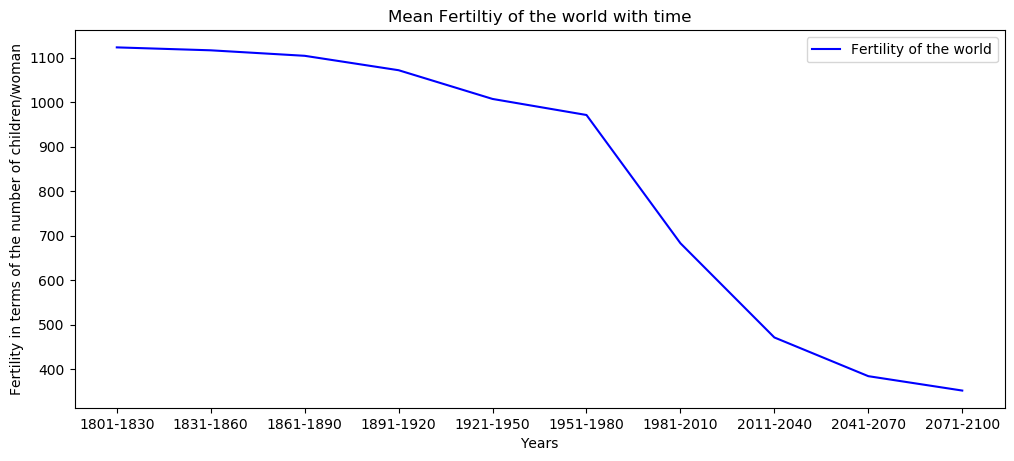

In [83]:
# Visualizing the mean fertility of the world in each time period 
fig=plt.figure(figsize=(12,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(s.index,s,'b', label= 'Fertility of the world')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Fertility in terms of the number of children/woman')
tit = 'Mean Fertiltiy of the world with time'
plt.title(tit)

## Analysis and Visualization

## Fertiltiy in The World Continents

In [84]:
# Aggrigating the fertiltiy according to continent
df_c2.groupby(['Continent']).mean()

,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,6.397778,6.397593,6.397593,6.397778,6.397593,6.397778,6.397778,6.397963,6.397963,6.397963,...,2.085185,2.075000,2.066667,2.057593,2.048889,2.040370,2.031852,2.024444,2.016481,2.016481
Asia,6.420000,6.419375,6.418958,6.418542,6.418125,6.417500,6.416875,6.416042,6.414583,6.413333,...,1.807500,1.806458,1.806250,1.806250,1.806458,1.806250,1.806458,1.805833,1.805208,1.805208
Europe,5.333718,5.346410,5.344103,5.347949,5.349487,5.331026,5.327692,5.291795,5.239231,5.315385,...,1.811795,1.812564,1.812564,1.813846,1.813846,1.815128,1.815897,1.816923,1.816923,1.816923
North America,5.934524,5.930476,5.928095,5.925714,5.923333,5.920952,5.918095,5.915714,5.913333,5.910952,...,1.790000,1.790476,1.790952,1.791905,1.791905,1.791905,1.794286,1.795238,1.796667,1.796667
Oceania,6.262000,6.259000,6.257000,6.255000,6.253000,6.251000,6.249000,6.247000,6.245000,6.243000,...,1.944000,1.938000,1.932000,1.927000,1.922000,1.916000,1.914000,1.909000,1.905000,1.905000
South America,6.265833,6.265833,6.265833,6.265833,6.265833,6.265833,6.265833,6.265833,6.265833,6.265833,...,1.790833,1.790833,1.790833,1.793333,1.793333,1.794167,1.794167,1.795000,1.795000,1.795000


# The Mean of the fertility in the world continents

In [85]:
# computing the overall mean fertility in each continent and visualize 
df_c3=df_c2.groupby(['Continent']).mean().mean(axis=1)
df_c3

Continent
Africa           5.277685
Asia             4.712277
Europe           3.275529
North America    4.252190
Oceania          4.683593
South America    4.454792
dtype: float64

Text(0, 0.5, 'Fertility Mean')

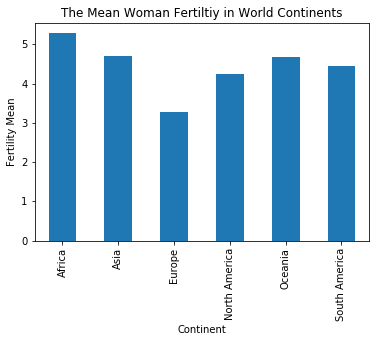

In [86]:
df_c3.plot(kind='bar', title='The Mean Woman Fertiltiy in World Continents')
plt.xlabel('Continent')
plt.ylabel('Fertility Mean')

### Fertility in Arab Countries

In [87]:
# arab_df  is a dataframe contains the fertility data related to Arab countries 
arab_df = df_c_grouped.query('country in ["Egypt", "Algeria" , "Sudan","Iraq", "Morocco" , "Saudi Arabia", "Yemen", "Jordan","United Arab Emirates","Syria", "Lebanon", "Libya", "Palestine", "Oman", "Kuwait", "Somalia","Mauritania", "Qatar","Tunisia","Bahrain","Djibouti","Comoros"]')
        

In [88]:
arab_df

,country,Continent,1801-1830,1831-1860,1861-1890,1891-1920,1921-1950,1951-1980,1981-2010,2011-2040,2041-2070,2071-2100
2,Algeria,Africa,6.990000,6.990000,6.990000,6.990000,7.239333,7.470000,3.898333,2.418667,1.938000,1.863333
11,Bahrain,Asia,7.023333,7.007667,6.994000,6.979000,6.996000,6.508333,3.272333,1.862000,1.669667,1.733667
36,Comoros,Africa,6.010000,6.010000,6.010000,6.010000,5.869667,6.809000,5.626333,3.820000,2.689000,2.141667
46,Djibouti,Africa,6.300000,6.300000,6.300000,6.300000,6.300000,6.571667,5.095333,2.471000,1.848667,1.762667
49,Egypt,Africa,6.054667,6.044667,6.034667,6.019667,6.156667,6.356000,4.017667,2.901667,2.242000,1.939667
77,Iraq,Asia,7.130000,7.130000,7.130000,7.130000,7.555667,6.880000,5.385333,3.911000,2.931000,2.376000
83,Jordan,Asia,6.970000,6.970000,6.970000,6.970000,7.227000,7.653667,4.925000,2.927667,2.082000,1.825333
87,Kuwait,Asia,6.870000,6.870000,6.870000,6.870000,7.023000,6.886333,3.137333,1.914333,1.821000,1.825000
91,Lebanon,Asia,5.740000,5.740000,5.740000,5.740000,5.748667,5.182333,2.599667,1.693333,1.717000,1.768000
94,Libya,Africa,7.200000,7.200000,7.200000,7.200000,7.189000,7.578333,4.075333,2.034000,1.760000,1.785000


In [89]:
# year columns only, without country name and continent
arab_df.iloc[:,2:]

,1801-1830,1831-1860,1861-1890,1891-1920,1921-1950,1951-1980,1981-2010,2011-2040,2041-2070,2071-2100
2,6.990000,6.990000,6.990000,6.990000,7.239333,7.470000,3.898333,2.418667,1.938000,1.863333
11,7.023333,7.007667,6.994000,6.979000,6.996000,6.508333,3.272333,1.862000,1.669667,1.733667
36,6.010000,6.010000,6.010000,6.010000,5.869667,6.809000,5.626333,3.820000,2.689000,2.141667
46,6.300000,6.300000,6.300000,6.300000,6.300000,6.571667,5.095333,2.471000,1.848667,1.762667
49,6.054667,6.044667,6.034667,6.019667,6.156667,6.356000,4.017667,2.901667,2.242000,1.939667
77,7.130000,7.130000,7.130000,7.130000,7.555667,6.880000,5.385333,3.911000,2.931000,2.376000
83,6.970000,6.970000,6.970000,6.970000,7.227000,7.653667,4.925000,2.927667,2.082000,1.825333
87,6.870000,6.870000,6.870000,6.870000,7.023000,6.886333,3.137333,1.914333,1.821000,1.825000
91,5.740000,5.740000,5.740000,5.740000,5.748667,5.182333,2.599667,1.693333,1.717000,1.768000
94,7.200000,7.200000,7.200000,7.200000,7.189000,7.578333,4.075333,2.034000,1.760000,1.785000


In [90]:
# Computing the fertility mean in each country of arab_df
df_c4=arab_df.groupby(['country']).mean().mean(axis=1)
df_c4

country
Algeria                 5.278767
Bahrain                 5.004600
Comoros                 5.099567
Djibouti                4.924933
Egypt                   4.776733
Iraq                    5.755900
Jordan                  5.452067
Kuwait                  5.008700
Lebanon                 4.166900
Libya                   5.322167
Mauritania              5.359500
Morocco                 4.859500
Oman                    5.317233
Palestine               5.674533
Qatar                   5.041200
Saudi Arabia            5.236167
Somalia                 6.051367
Sudan                   5.507033
Syria                   5.278767
Tunisia                 4.706000
United Arab Emirates    4.989133
Yemen                   5.654433
dtype: float64

Text(0, 0.5, 'Fertility Mean')

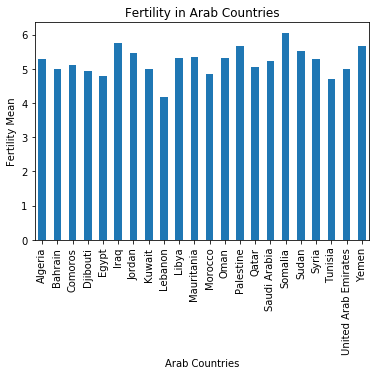

In [91]:
df_c4.plot(kind='bar', title='Fertility in Arab Countries')
plt.xlabel('Arab Countries')
plt.ylabel('Fertility Mean')

In [92]:
s=df_c_grouped.mean()

In [93]:
# s is a list of column names
s.index

Index(['1801-1830', '1831-1860', '1861-1890', '1891-1920', '1921-1950',
       '1951-1980', '1981-2010', '2011-2040', '2041-2070', '2071-2100'],
      dtype='object')

## The Fertility in Arab Countries compared to the fertility in the world

Text(0.5, 1.0, 'Mean Fertiltiy in The Arab Countries againest Mean Fertiltity of the world')

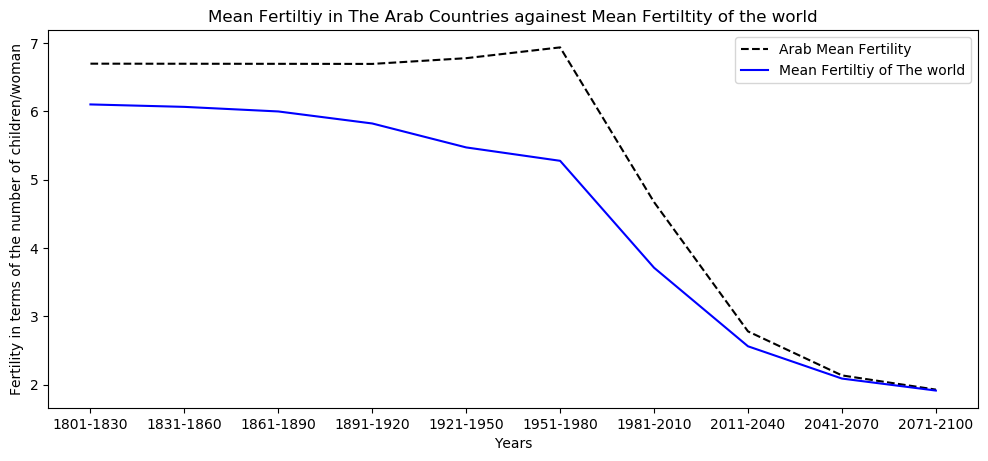

In [94]:
arab_mean = list(arab_df.mean())

#tit = 'Mean Fertiltiy in The Arab Countries againest Mean Fertiltity of the world'
fig=plt.figure(figsize=(12,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(s.index,arab_mean,'k--', label= 'Arab Mean Fertility')
w_mean=list(df_c_grouped.mean())
plt.plot(s.index,w_mean,'b', label='Mean Fertiltiy of The world')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Fertility in terms of the number of children/woman')
tit = 'Mean Fertiltiy in The Arab Countries againest Mean Fertiltity of the world'
plt.title(tit)

## Visualizing the fertilty of a particular country input by the user

In [97]:
# function to return the data of a particular country entered by the user
def userinput_based_analysis(df,u_country):
    new_df = df[df['country']== u_country]
    
    return new_df
    


Do you want an anlysis for the duration of specific stations? 

Enter Yes \ Noyes
Input the country Egypt
[6.05466666666667, 6.044666666666665, 6.034666666666667, 6.019666666666668, 6.156666666666666, 6.356, 4.017666666666667, 2.901666666666666, 2.2419999999999995, 1.9396666666666669]


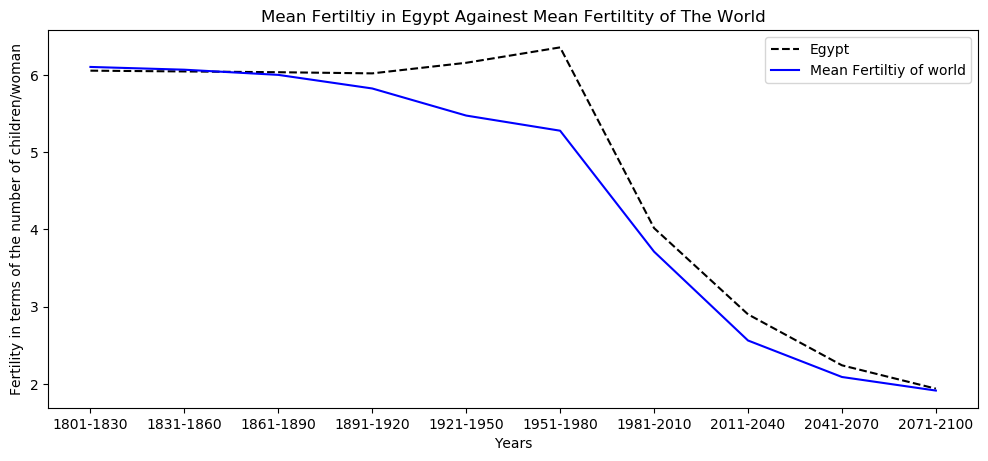

In [98]:
# Analysis Related to particular company entered by the user
print("\nDo you want an anlysis for the duration of specific stations? \n")
    
choice =input("Enter Yes \ No").lower()
if choice == 'yes':
    u_country= input("Input the country ")
    l= userinput_based_analysis(df_c_grouped,u_country)
    
    lis = list(l.iloc[0,2:])
    print(lis)
    
    # Visualize
    tit = 'Mean Fertiltiy in '+ u_country + ' againest mean fertiltity of the world'
    fig=plt.figure(figsize=(12,5), dpi= 100, facecolor='w', edgecolor='k')
    plt.plot(s.index,lis,'k--', label= u_country)
    w_mean=list(df_c_grouped.mean())
    plt.plot(s.index,w_mean,'b', label='Mean Fertiltiy of world')
    plt.legend()
    plt.xlabel('Years')
    plt.ylabel('Fertility in terms of the number of children/woman')
    tit = 'Mean Fertiltiy in '+ u_country + ' Againest Mean Fertiltity of The World'
    plt.title(tit)
    #fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
    #plt.show()
        